## Exploratory Data Analysis

In this notebook we explore original "Face Mask Detection" dataset. We try to see which xml tags are redundant and are better to delete as a preprocessing step.

**IMPORTANT NOTE!!!**
On every picture we will paint boxes with faces using such colors: green for correctly weared masks, yellow for incorrectly weared masks, red for faces without masks.

In [1]:
import os
import os.path
from natsort import natsorted
from xml.etree.ElementTree import parse

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
%matplotlib inline

In [2]:
DATA_FOLDER = "./data/"
label_to_color = {"with_mask": "g", "mask_weared_incorrect": "y", "without_mask": "r"}
image_folder = os.path.join(DATA_FOLDER, "images")
annot_folder = os.path.join(DATA_FOLDER, "annotations")
image_paths = natsorted([os.path.join(image_folder, image_name) 
                      for image_name in os.listdir(image_folder)])
annot_paths = natsorted([os.path.join(annot_folder, annot_name)
                      for annot_name in os.listdir(annot_folder)])

print(f"example of image file path: {image_paths[0]}")
print(f"example of annotation file path: {annot_paths[0]}")

example of image file path: ./data/images/maksssksksss0.png
example of annotation file path: ./data/annotations/maksssksksss0.xml


In [3]:
def process_xml_annotation(xml_file_name):
    """Extract information from annotation xml file of the photo.
    
    Keyword arguments:
    xml_file_name -- path to the xml file
    """    
    doc = parse(xml_file_name)
    
    # Get meta parameters from annotation
    folder_arg = doc.findtext("folder")
    filename_arg = doc.findtext("filename")
    segmented_arg = doc.findtext("segmented")
    
    # Get size dimensions of the picture
    size_obj = doc.find("size")
    width_arg = int(size_obj.findtext("width"))
    height_arg = int(size_obj.findtext("height"))
    depth_arg = int(size_obj.findtext("depth"))
    
    # Iterate through all objects
    objects = []
    for obj in doc.findall("object"):
        name_arg = obj.findtext("name")
        pose_arg = obj.findtext("pose")
        occluded_arg = obj.findtext("occluded")        
        truncated_arg = obj.findtext("truncated")
        difficult_arg = obj.findtext("difficult")
        
        # Get the coordinates of the box
        bndbox_obj = obj.find("bndbox")
        xmin_arg = int(bndbox_obj.findtext("xmin"))
        xmax_arg = int(bndbox_obj.findtext("xmax"))
        ymin_arg = int(bndbox_obj.findtext("ymin"))
        ymax_arg = int(bndbox_obj.findtext("ymax"))
        
        objects.append((name_arg, pose_arg, occluded_arg, truncated_arg, difficult_arg,
                        (xmin_arg, ymin_arg), (xmax_arg, ymax_arg)))
    return (folder_arg, filename_arg, segmented_arg,
            (width_arg, height_arg, depth_arg), objects)


def show_image(image_path, annot_path, title=None):
    """Plot image that is located at image_path
    
    Keyword arguments:
    image_path -- path to the image
    """
    fig, ax = plt.subplots(1)  # create figure and axes

    img = mpimg.imread(image_path)  # extract image using path
    ax.imshow(img)  # display image
    if title:
        ax.set_title(title)
    
    # Get box coordinates from xml annotation
    _, _, _, dims, boxes = process_xml_annotation(annot_path)
    for box in boxes:  # add boxes for faces and masks
        label = box[0]
        xmin, ymin = box[5]
        xmax, ymax = box[6]
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2,
                                 edgecolor=label_to_color[label], facecolor="none")
        ax.add_patch(rect)  # add box to the image
    
    plt.show()  # show final result

./data/images/maksssksksss0.png:


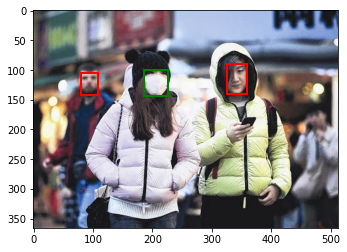

./data/images/maksssksksss1.png:


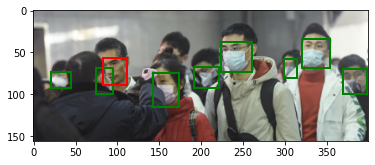

./data/images/maksssksksss2.png:


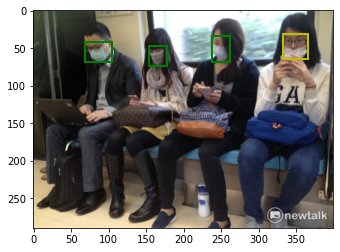

In [4]:
# Show 3 examples of the images in dataset
for i in range(3):
    print(f"{image_paths[i]}:")
    show_image(image_paths[i], annot_paths[i])

---

Now we will gather tags from all xml annotations and explore their distributions.

In [5]:
folder_ls, segmented_ls, width_ls, height_ls, depth_ls, name_ls, pose_ls, occluded_ls,\
    truncated_ls, difficult_ls = [], [], [], [], [], [], [], [], [], []

for annot_path in annot_paths:
    folder_arg, filename_arg, segmented_arg, dims, objects = process_xml_annotation(annot_path)

    folder_ls.append(folder_arg)
    segmented_ls.append(segmented_arg)
    width_ls.append(dims[0])
    height_ls.append(dims[1])
    depth_ls.append(dims[2])
    
    for box in objects:
        name_arg, pose_arg, occluded_arg, truncated_arg, difficult_arg, _, _ = box
    
        name_ls.append(name_arg)
        pose_ls.append(pose_arg)
        occluded_ls.append(occluded_arg)
        truncated_ls.append(truncated_arg)
        difficult_ls.append(difficult_arg)

In [6]:
print("'folder' unique values: {}".format(set(folder_ls)))
print("'segmented' unique values: {}".format(set(segmented_ls)))
print("'pose' unique values: {}".format(set(pose_ls)))
print("'occluded' unique values: {}".format(set(occluded_ls)))
print("'truncated' unique values: {}".format(set(truncated_ls)))
print("'difficult' unique values: {}".format(set(difficult_ls)))
print("'depth' unique values: {}".format(set(depth_ls)))
print("'name' unique values: {}".format(set(name_ls)))
print("Number of unique values of 'width' argument: {}".format(len(set(width_ls))))
print("Number of unique values of 'height' argument: {}".format(len(set(height_ls))))

'folder' unique values: {'images'}
'segmented' unique values: {'0'}
'pose' unique values: {'Unspecified'}
'occluded' unique values: {'0'}
'truncated' unique values: {'0'}
'difficult' unique values: {'0'}
'depth' unique values: {3}
'name' unique values: {'with_mask', 'without_mask', 'mask_weared_incorrect'}
Number of unique values of 'width' argument: 39
Number of unique values of 'height' argument: 104


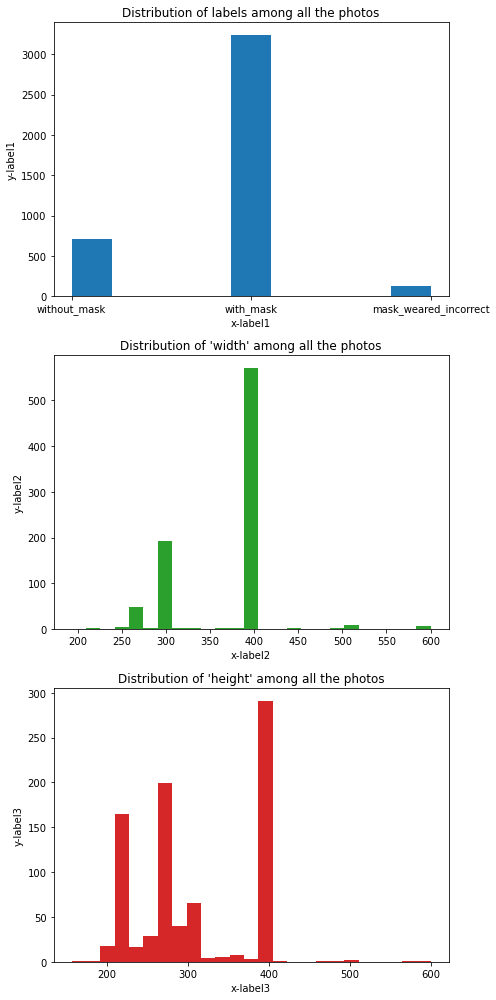

In [7]:
plt.rcParams["figure.figsize"] = [7.0, 14.0]
fig, axes = plt.subplots(3)

axes[0].hist(name_ls, bins=9)
axes[0].set_title("Distribution of labels among all the photos")
axes.flat[0].set(xlabel='x-label1', ylabel='y-label1')

axes[1].hist(width_ls, bins=25, color='tab:green')
axes[1].set_title("Distribution of 'width' among all the photos")
axes.flat[1].set(xlabel='x-label2', ylabel='y-label2')

axes[2].hist(height_ls, bins=25, color='tab:red')
axes[2].set_title("Distribution of 'height' among all the photos")
axes.flat[2].set(xlabel='x-label3', ylabel='y-label3')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
fig.tight_layout()
plt.show()

---

#### Conclusion for meta-data information

Our explorations showed us that arguments _folder_, _segmented_, _pose_, _occluded_, _truncated_, _difficult_, _depth_ have only one possible value. This allows us to consider them redundant and delete on the preprocessing step.

We saw that label argument _name_ is unequally distributed: values "with_mask" occur much more likely than "without_mask" and "mask_weared_incorrect".

_width_ and _height_ arguments are represented mostly by a couple of values, but other values occur too. So we can be not bothered with a size of the photo.

---

In [ ]:
# Show all dataset
for image_path, annot_path in zip(image_paths, annot_paths):
    print(f"{image_path}:")
    show_image(image_path, annot_path)

Duplicates from the dataset


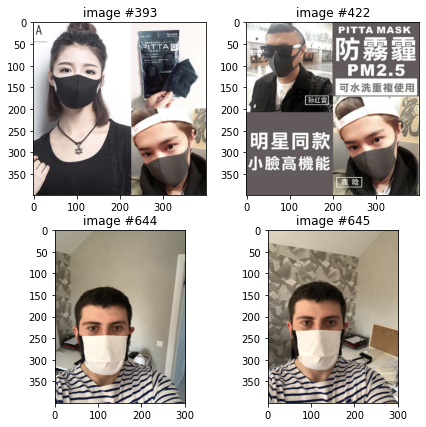

Incorrectly labeled photos in the dataset


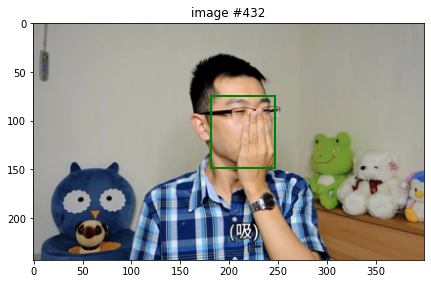

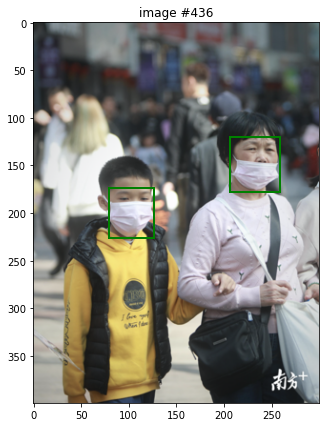

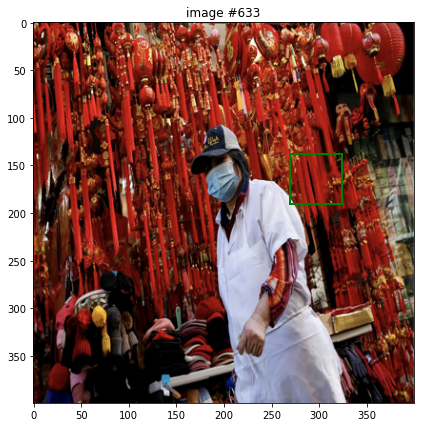

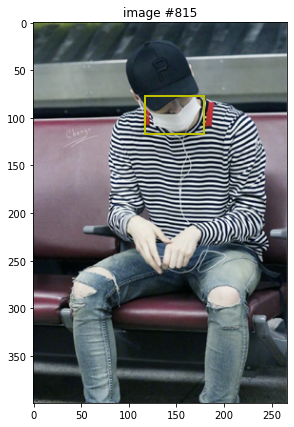

In [8]:
print("Duplicates from the dataset")
plt.rcParams["figure.figsize"] = [7.0, 7.0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
img1 = mpimg.imread(image_paths[393])
ax1.imshow(img1)
ax1.set_title("image #393")

img2 = mpimg.imread(image_paths[422])
ax2.imshow(img2)
ax2.set_title("image #422")

img3 = mpimg.imread(image_paths[644])
ax3.imshow(img3)
ax3.set_title("image #644")

img4 = mpimg.imread(image_paths[645])
ax4.imshow(img4)
ax4.set_title("image #645")

plt.show()

print("Incorrectly labeled photos in the dataset")
show_image(image_paths[432], annot_paths[432], title="image #432")
show_image(image_paths[436], annot_paths[436], title="image #436")
show_image(image_paths[633], annot_paths[633], title="image #633")
show_image(image_paths[815], annot_paths[815], title="image #815")

---

#### Conclusion for manual inspection of the dataset

- there are pictures in the dataset where there are objects in front of masks and faces
- there are pictures with masks of different colors
- many wrongly weared masks are considered such because of the visible nose (rarely because of the visible mouth)
- there are photos with a very big amount of people
- there are also many photos of two men in different poses, with and without mask (creators of the dataset?)
- dataset mostly consists of photos with asian people, black people are almost not present at all
- there are a couple of duplicates (393-422, 644-645)
- there are some incorrectly labeled photos (432, 436, 633, 815)